# Import Libraries

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# xlrd error handling
try:
    import xlrd
    xlrd.xlsx.ensure_elementtree_imported(False, None)
    xlrd.xlsx.Element_has_iter = True
except:
    pass

# stop

# Car Driving

In [ ]:
# Create 'LogFuel.txt' file if not already available.

if not os.path.exists('LogFuel.txt'):
    with open('LogFuel.txt', 'w') as f:
        f.write('User Input: Program Start\n')

In [ ]:


# Function to calculate the maximum distance that the car can be driven based on fuel efficiency and fuel level
def calculate_max_distance(mpg, fuel_level):
    return mpg * fuel_level

# Function to simulate driving the car for a certain distance, reducing the fuel level in the gas tank, and returning the current fuel level
def drive(mpg, fuel_level):
    distance = int(input("How many miles to drive: "))
    max_distance = calculate_max_distance(mpg, fuel_level)
    if distance > max_distance:
        print(f"Error: You cannot drive more than {max_distance} miles on the remaining fuel.")
        return fuel_level
    else:
        fuel_level -= distance / mpg
        print(f"You drove {distance} miles. You can drive another {calculate_max_distance(mpg, fuel_level)} miles on this gas.")
        return fuel_level

# Function to add gas to the fuel tank, up to the maximum tank capacity, and return the updated fuel level
def add_gas(tank_size, fuel_level):
    gas = float(input("How much gas to add: "))
    if fuel_level + gas > tank_size:
        print(f"Error: You cannot add more than {tank_size - fuel_level} gallons of gas to fill up the tank.")
        return fuel_level
    else:
        fuel_level += gas
        print(f"You added {gas} gallons of gas. The tank now has {fuel_level} gallons.")
        return fuel_level

# Function to display the current fuel level
def show_fuel_level(fuel_level):
    print(f"The current fuel level is {fuel_level} gallons.")

# Function to log user inputs and associated results to a log file called LogFuel.txt
def log_input_result(user_input, result):
    with open("LogFuel.txt", "a") as f:
        f.write(f"User Input: {user_input} - {result}\n")

# Main function
def main():
    # Ask for user inputs
    mpg = int(input("Please enter miles per gallon: "))
    tank_size = int(input("Tank size (in gallons): "))

    fuel_level = 0  # initialize fuel level to 0

    while True:
        # Display the main menu and ask the user what to do
        print("What would you like to do:")
        print("1. See current fuel level")
        print("2. Drive")
        print("3. Add gas")
        print("4. Exit")
        user_input = input()

        if user_input == "1":
            show_fuel_level(fuel_level)
            log_input_result(user_input, f"Fuel level shown: {fuel_level} gallons")
        elif user_input == "2":
            fuel_level = drive(mpg, fuel_level)
            log_input_result(user_input, f"Fuel level after driving: {fuel_level} gallons")
        elif user_input == "3":
            fuel_level = add_gas(tank_size, fuel_level)
            log_input_result(user_input, f"Fuel level after adding gas: {fuel_level} gallons")
        elif user_input == "4":
            sys.exit()
        else:
            print("Invalid input. Please enter 1, 2, 3, or 4.")


if __name__ == "__main__":
    main()



# Aluminum Sheets Dataset

In [3]:
# Import/Load dataset as dataframe
df = pd.read_csv("C:/Users/NayeemIslam/Downloads/AluminiumSheetPricesData.csv")
df

,price,weight,cut,grade,thickness,density,Width,Length,Height
0,326,0.23,Ideal,E,THK2,61.5,3.95,3.98,2.43
1,326,0.21,Premium,E,THK1,59.8,3.89,3.84,2.31
2,327,0.23,Good,E,THN1,56.9,4.05,4.07,2.31
3,334,0.29,Premium,I,THN2,62.4,4.20,4.23,2.63
4,335,0.31,Good,J,THK2,63.3,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,THK1,60.8,5.75,5.76,3.50
53936,2757,0.72,Good,D,THK1,63.1,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,THK1,62.8,5.66,5.68,3.56
53938,2757,0.86,Premium,H,THK2,61.0,6.15,6.12,3.74


In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Number of records after removing duplicates:", len(df))


Number of records after removing duplicates: 53652


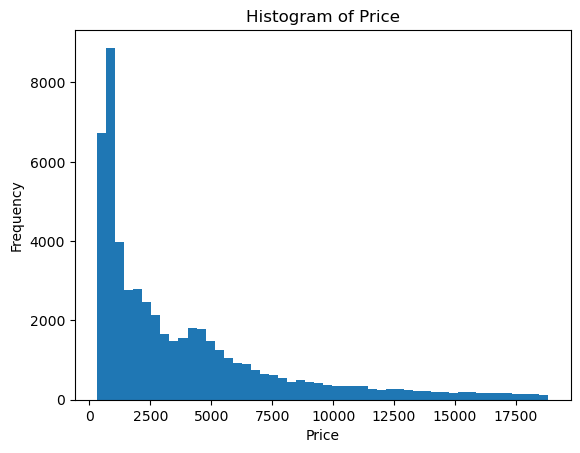

In [5]:
# Draw a histogram of the price variable
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [6]:
# Basic data exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.nunique())

   price  weight      cut grade thickness  density  Width  Length  Height
0    326    0.23    Ideal     E      THK2     61.5   3.95    3.98    2.43
1    326    0.21  Premium     E      THK1     59.8   3.89    3.84    2.31
2    327    0.23     Good     E      THN1     56.9   4.05    4.07    2.31
3    334    0.29  Premium     I      THN2     62.4   4.20    4.23    2.63
4    335    0.31     Good     J      THK2     63.3   4.34    4.35    2.75
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53652 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      53652 non-null  int64  
 1   weight     53652 non-null  float64
 2   cut        53652 non-null  object 
 3   grade      53646 non-null  object 
 4   thickness  53652 non-null  object 
 5   density    53638 non-null  float64
 6   Width      53652 non-null  float64
 7   Length     53652 non-null  float64
 8   Height     53652 non-null  float64
dtypes: 

In [7]:
# Remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Number of records after removing outliers:", len(df))

Number of records after removing outliers: 47637


In [8]:
# Treat missing values
df.dropna(inplace=True)
df

C:\Users\NayeemIslam\AppData\Local\Temp\ipykernel_11820\4113727281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,price,weight,cut,grade,thickness,density,Width,Length,Height
0,326,0.23,Ideal,E,THK2,61.5,3.95,3.98,2.43
1,326,0.21,Premium,E,THK1,59.8,3.89,3.84,2.31
3,334,0.29,Premium,I,THN2,62.4,4.20,4.23,2.63
4,335,0.31,Good,J,THK2,63.3,4.34,4.35,2.75
6,336,0.24,Very Good,I,VTHN1,62.3,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,THK1,60.8,5.75,5.76,3.50
53936,2757,0.72,Good,D,THK1,63.1,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,THK1,62.8,5.66,5.68,3.56
53938,2757,0.86,Premium,H,THK2,61.0,6.15,6.12,3.74


In [9]:
# # Partition the data
# X = df.drop(columns=['price'])

# Selecting only numeric columns for input data
X = df.select_dtypes(include=np.number)

y = df['price']

# y = pd.to_numeric(y, errors='coerce')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)



In [10]:
# Build KNN model
rmse = []
for k in range(1, 20):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

best_k = np.argmin(rmse) + 1
print("Best k:", best_k)

Best k: 2


In [11]:
# 2nd Option to get value of best K | Should follow the previous value if there is no error in the previous code | Best k Value will varry, need to choose which value to use


from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the best value of k for KNN model
k_values = list(range(1, 30, 2))
accuracies = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)

best_k = k_values[accuracies.index(max(accuracies))]
print("Best value of k for KNN model:", best_k)


Best value of k for KNN model: 5


In [ ]:
# Build logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
print("Accuracy for logistic regression model:", accuracy_score(y_test, y_pred))


In [ ]:
# Compare models
if np.sqrt(mean_squared_error(y_test, y_pred)) < np.min(rmse):
    print("The best model is logistic regression.")
else:
    print("The best model is KNN.")